In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import polars as pl

In [2]:
def load_dfs(filenames):
    return (
        pd
        .read_csv(filenames,
                 usecols=["tpep_pickup_datetime", "passenger_count",
                         "trip_distance", "fare_amount",
                         "extra", "mta_tax", "tip_amount",
                         "tolls_amount", "improvement_surcharge",
                         "total_amount", "congestion_surcharge"],
                 parse_dates=["tpep_pickup_datetime"])
    )

In [21]:
df = pd.concat(load_dfs(file)
          for file in Path("/Users/ahmedabukar/Downloads/:/data").glob("nyc_taxi*.csv")
)
df

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-01-01 00:28:15,1.0,1.20,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,2020-01-01 00:35:39,1.0,1.20,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2020-01-01 00:47:41,1.0,0.60,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,2020-01-01 00:55:23,1.0,0.80,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2020-01-01 00:01:58,1.0,0.00,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7667787,2019-01-31 23:57:36,1.0,4.79,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0
7667788,2019-01-31 23:32:03,1.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667789,2019-01-31 23:36:36,1.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667790,2019-01-31 23:14:53,1.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

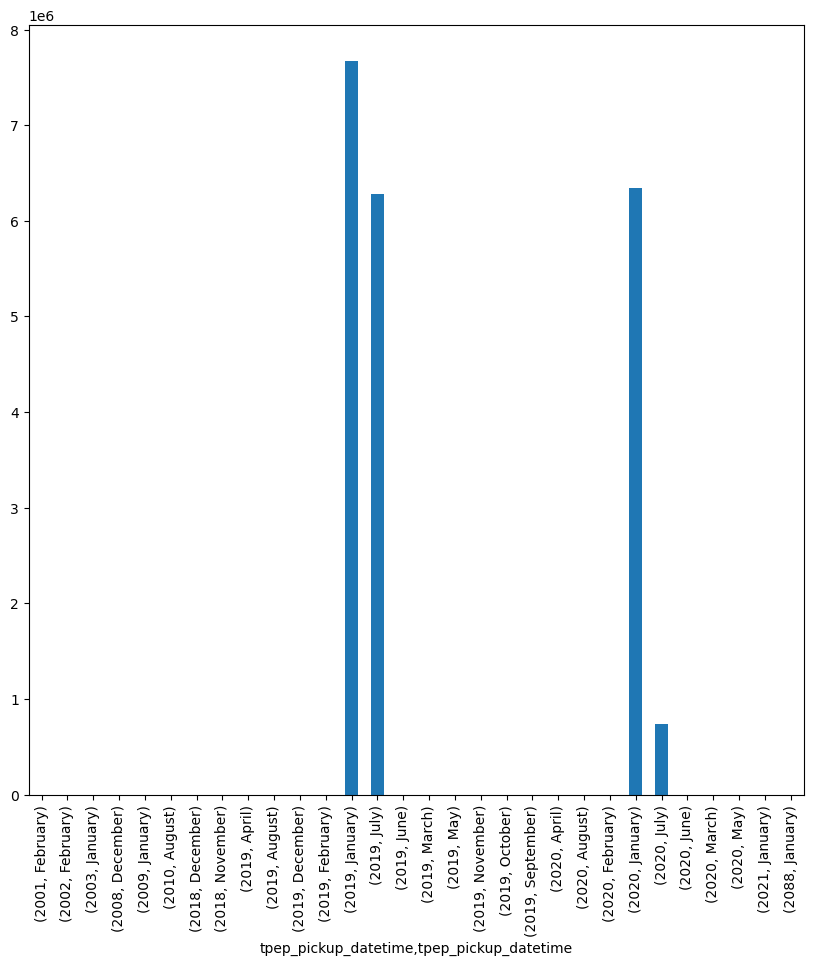

In [4]:
# create a bar plot showing how many rides took place during each month and year of our data set
(
    df
    .groupby([df["tpep_pickup_datetime"].dt.year, df["tpep_pickup_datetime"].dt.month_name()])
    .count()
    ["passenger_count"]
    .plot
    .bar(figsize=(10, 10))
)

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

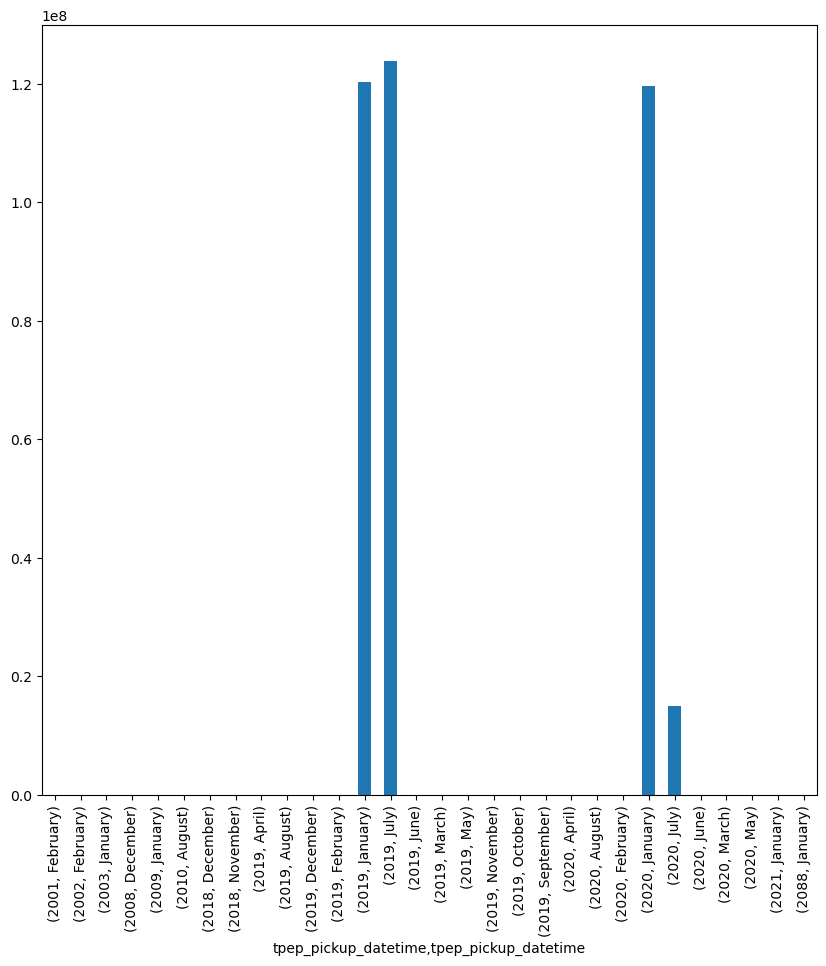

In [5]:
# create a bar plot showing the total amount paid in taxi rides 
# for every year and month of the date set
(
    df
    .groupby([df["tpep_pickup_datetime"].dt.year, df["tpep_pickup_datetime"].dt.month_name()])
    ["total_amount"]
    .sum()
    .plot.bar(figsize=(10, 10))
)


In [ ]:
# create a bar plot showing fare_amount, tolls_amount, extra, mta_amount,
# and tip_amount paid in taxi rides per month and per year
(
    df[["fare_amount", "tolls_amount", "mta_tax", "extra", "tip_amount"]]
    .groupby([df["tpep_pickup_datetime"].dt.year, df["tpep_pickup_datetime"].dt.month_name()])
    .plot(kind='bar', stacked=True)
)

In [ ]:
# create a bar plot showing fare_amount, tolls_amount, extra, mta_tax and tip_amount
# taxi rides per passengers
(
    df
    .groupby(df["passenger_count"])
    [["fare_amount", "tolls_amount", "mta_tax", "extra", "tip_amount"]]
    .plot.bar(stacked=True)
)

<Axes: ylabel='Frequency'>

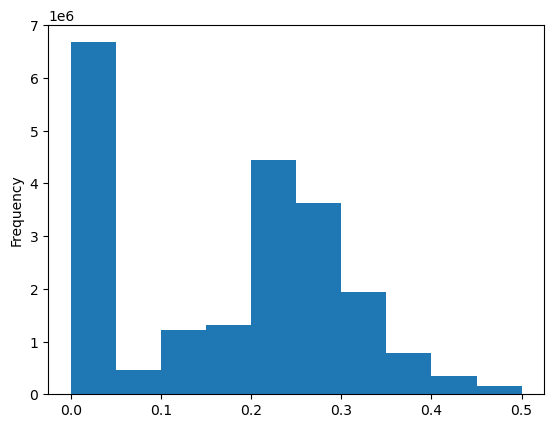

In [12]:
# create a histogram showing the frequency of each tipping percentage between (and including)
# 0% and 50%
(
    df
    [df["fare_amount"] > 0]
    .assign(tip_percentage=(lambda df_ : df_["tip_amount"] / df_["fare_amount"]))
    .loc[lambda df_ : df_["tip_percentage"] <= 0.50, "tip_percentage"]
    .plot.hist()
)

In [22]:
df_july = (
    df
    .set_index("tpep_pickup_datetime")
    .loc["2020-07"]
)
df_july.shape[0]

800408

In [24]:
df_july

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
tpep_pickup_datetime,,,,,,,,,,
2020-07-10 10:46:19,1.0,0.64,5.50,1.0,0.5,1.96,0.0,0.3,11.76,2.5
2020-07-10 10:56:46,1.0,0.93,5.50,1.0,0.5,1.96,0.0,0.3,11.76,2.5
2020-07-10 11:03:49,1.0,2.41,12.50,1.0,0.5,3.36,0.0,0.3,20.16,2.5
2020-07-10 11:25:13,1.0,0.54,3.50,1.0,0.5,1.56,0.0,0.3,9.36,2.5
2020-07-10 11:34:11,1.0,1.07,7.00,1.0,0.5,2.26,0.0,0.3,13.56,2.5
...,...,...,...,...,...,...,...,...,...,...
2020-07-19 13:27:52,NaN,24.23,79.95,0.0,0.5,2.75,0.0,0.3,83.50,0.0
2020-07-19 13:02:00,NaN,4.40,16.23,0.0,0.5,2.75,0.0,0.3,19.78,0.0
2020-07-19 13:32:00,NaN,8.78,34.90,0.0,0.5,2.75,0.0,0.3,38.45,0.0


<Axes: xlabel='tpep_pickup_datetime'>

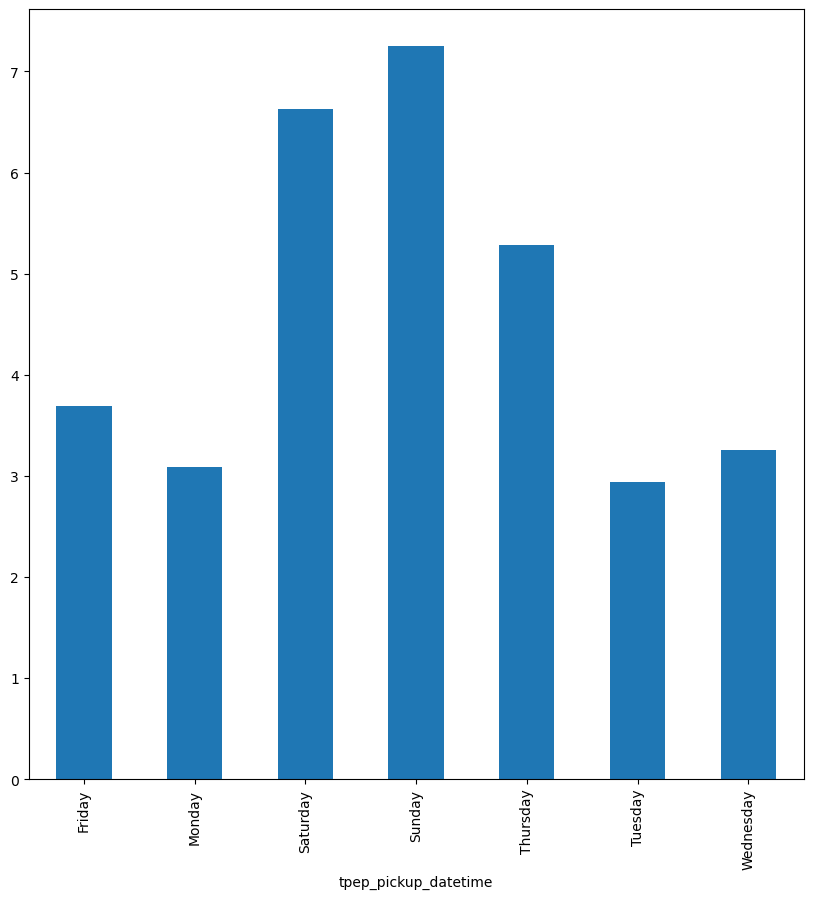

In [25]:
# create a bar plot showing the average distance traveled per day of the week in july 2020.
# the x axis should show the name of each day 
(
    df_july
    .groupby(df_july.index.day_name())
    ["trip_distance"]
    .mean()
    .plot.bar(figsize=(10, 10))
)

<Axes: xlabel='trip_distance', ylabel='total_amount'>

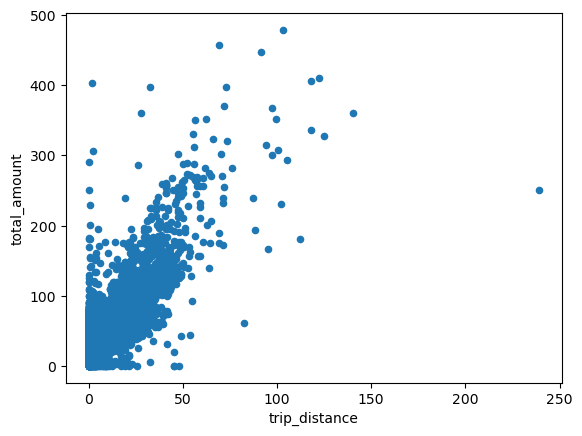

In [18]:
# create a scatter plot with the data from July 2020
# comparing trip_distance with total_amount.
# ignore all rides in which either value was less than or equal 0 or greater than 500.
(
    df_july
    .query("trip_distance > 0 & trip_distance < 500")
    .query("total_amount > 0 & total_amount < 500")
    [["trip_distance", "total_amount"]]
    .plot.scatter(x="trip_distance", y="total_amount")
)

<Axes: xlabel='passenger_count', ylabel='trip_distance'>

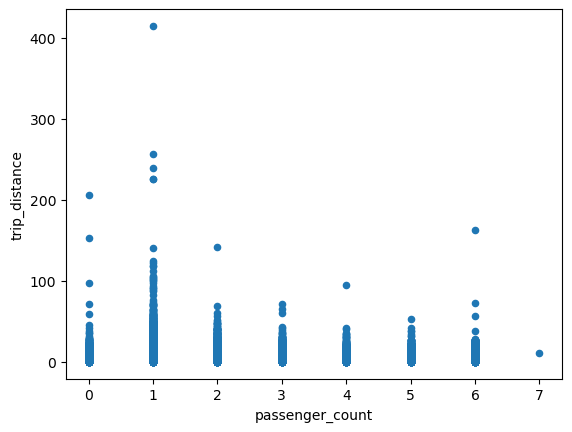

In [31]:
# create a scatter plot with the taxi data from july 2020, comparing trip_distace 
# and passenger_count
# ignore all rides in which trip_distance was less than or equal 0 or greater than 500
(
    df_july
    .query("trip_distance > 0 & trip_distance < 500")
    [["trip_distance", "passenger_count"]]
    .plot.scatter(x="passenger_count", y="trip_distance")
)